# NDL Lab 5: K-Means & DBSCAN

## Download Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sinderpreet/customer-segmentation-and-clustering-python")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'customer-segmentation-and-clustering-python' dataset.
Path to dataset files: /kaggle/input/customer-segmentation-and-clustering-python


## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

## Load Dataframe

In [ ]:
df = pd.read_csv(path + "/Mall_Customers.csv")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Subset Dataset to Features

In [ ]:
features_df = df[['Annual Income (k$)', 'Spending Score (1-100)']]

features_df.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Exploratory Data Analysis (EDA)

### Visualize the distributions of the features we will use for clustering

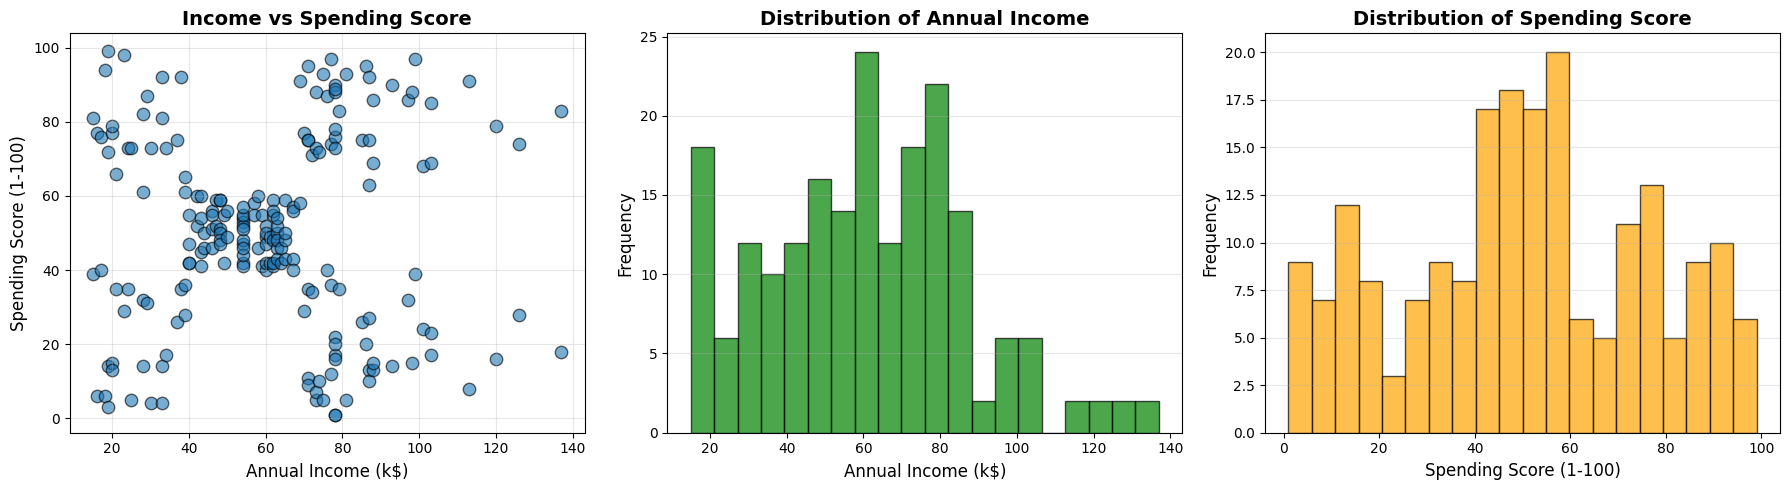

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatterplot: Annual Income vs Spending Score
axes[0].scatter(features_df['Annual Income (k$)'], features_df['Spending Score (1-100)'],
                alpha=0.6, edgecolors='black', s=80)
axes[0].set_xlabel('Annual Income (k$)', fontsize=12)
axes[0].set_ylabel('Spending Score (1-100)', fontsize=12)
axes[0].set_title('Income vs Spending Score', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Histogram: Annual Income
axes[1].hist(features_df['Annual Income (k$)'], bins=20, edgecolor='black', alpha=0.7, color='green')
axes[1].set_xlabel('Annual Income (k$)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of Annual Income', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

# Histogram: Spending Score
axes[2].hist(features_df['Spending Score (1-100)'], bins=20, edgecolor='black', alpha=0.7, color='orange')
axes[2].set_xlabel('Spending Score (1-100)', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].set_title('Distribution of Spending Score', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## K-Means

### Finding the Optimal # of Clusters (k)
Plot the objective function (within cluster sum of squares) for each value of k in the range 1-10. The optimal k is defined as the value of k such that any greater k value yields diminishing returns: visualize this as the "elbow" of this chart.

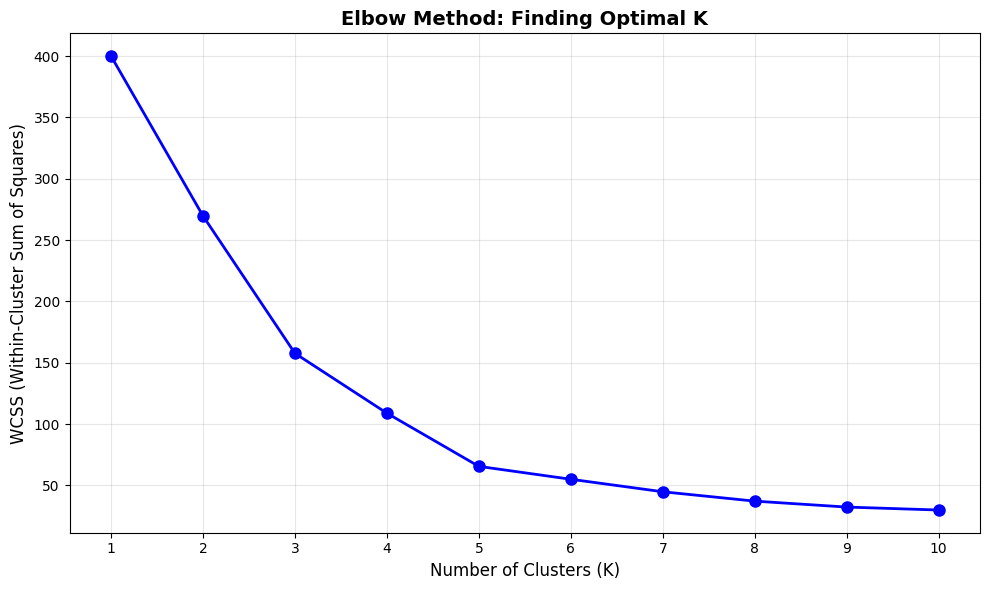

In [ ]:
X = features_df.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method: Finding Optimal K', fontsize=14, fontweight='bold')
plt.xticks(K_range)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Train K-Means with K=5
Choose k=5 as the optimal number of clusters from the previous plot. Fit our K-Means model with this parameter and plot the resulting clusters.

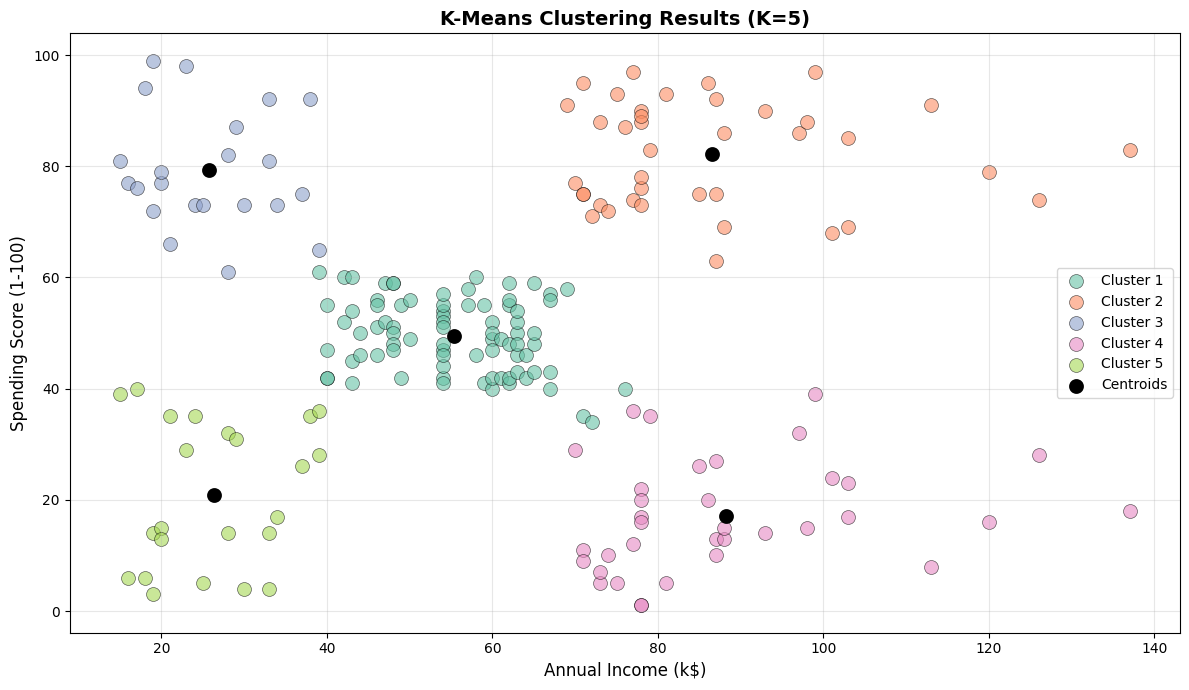

In [ ]:
kmeans5 = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster_K5'] = kmeans5.fit_predict(X_scaled)

centers5 = scaler.inverse_transform(kmeans5.cluster_centers_)

plt.figure(figsize=(12, 7))
colors5 = plt.cm.Set2(range(5))

for i in range(5):
    cluster_data = df[df['Cluster_K5'] == i]
    plt.scatter(
        cluster_data['Annual Income (k$)'],
        cluster_data['Spending Score (1-100)'],
        s=100,
        c=[colors5[i]],
        label=f'Cluster {i+1}',
        alpha=0.6,
        edgecolors='black',
        linewidth=0.5
    )

plt.scatter(
    centers5[:, 0],  # Annual Income
    centers5[:, 1],  # Spending Score
    s=300,
    c='black',
    marker='.',
    linewidth=2,
    label='Centroids',
    zorder=10
)

plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('K-Means Clustering Results (K=5)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Train K-Means with K=6
Choose k=6 to show the result of adding another cluster. Fit our K-Means model with this parameter and plot the resulting clusters.

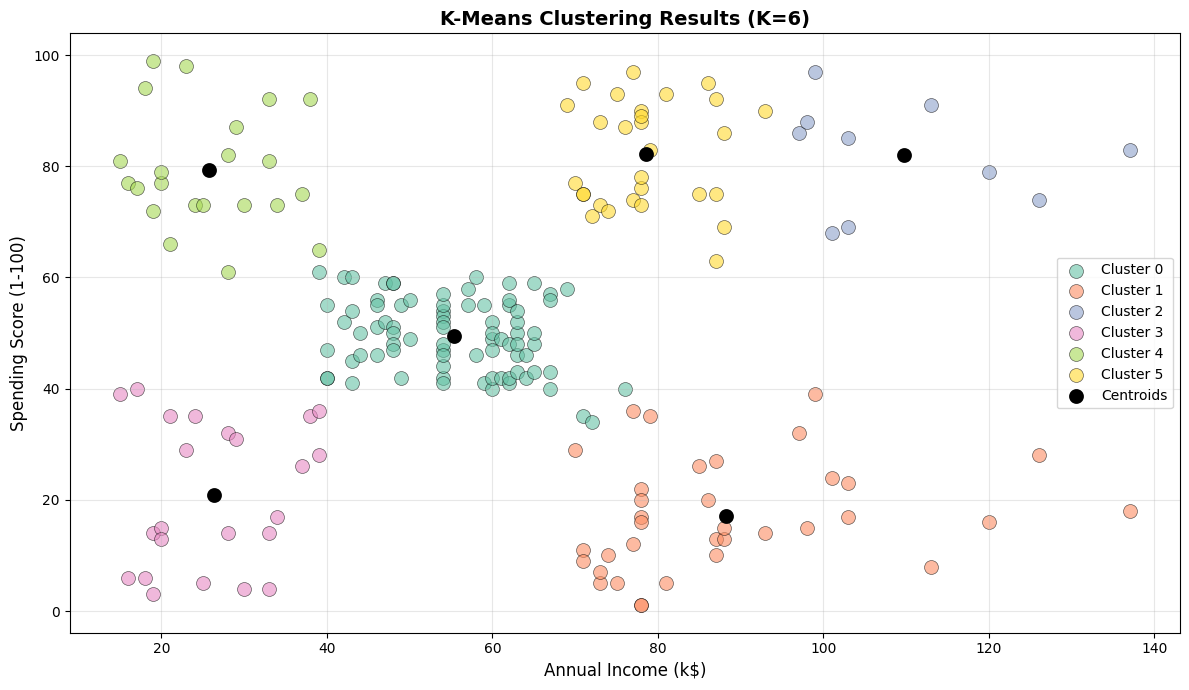

In [ ]:
kmeans6 = KMeans(n_clusters=6, random_state=42, n_init=10)
df['Cluster_K6'] = kmeans6.fit_predict(X_scaled)

centers6 = scaler.inverse_transform(kmeans6.cluster_centers_)

plt.figure(figsize=(12, 7))
colors6 = plt.cm.Set2(range(6))

for i in range(6):
    cluster_data = df[df['Cluster_K6'] == i]
    plt.scatter(
        cluster_data['Annual Income (k$)'],
        cluster_data['Spending Score (1-100)'],
        s=100,
        c=[colors6[i]],
        label=f'Cluster {i}',
        alpha=0.6,
        edgecolors='black',
        linewidth=0.5
    )

plt.scatter(
    centers6[:, 0],  # Annual Income
    centers6[:, 1],  # Spending Score
    s=300,
    c='black',
    marker='.',
    linewidth=2,
    label='Centroids',
    zorder=10
)

plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('K-Means Clustering Results (K=6)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Interpretation: Profiling our Clusters
Now that we have assigned each data point to a cluster, we can analyze the distributions of each cluster to draw conclusions.

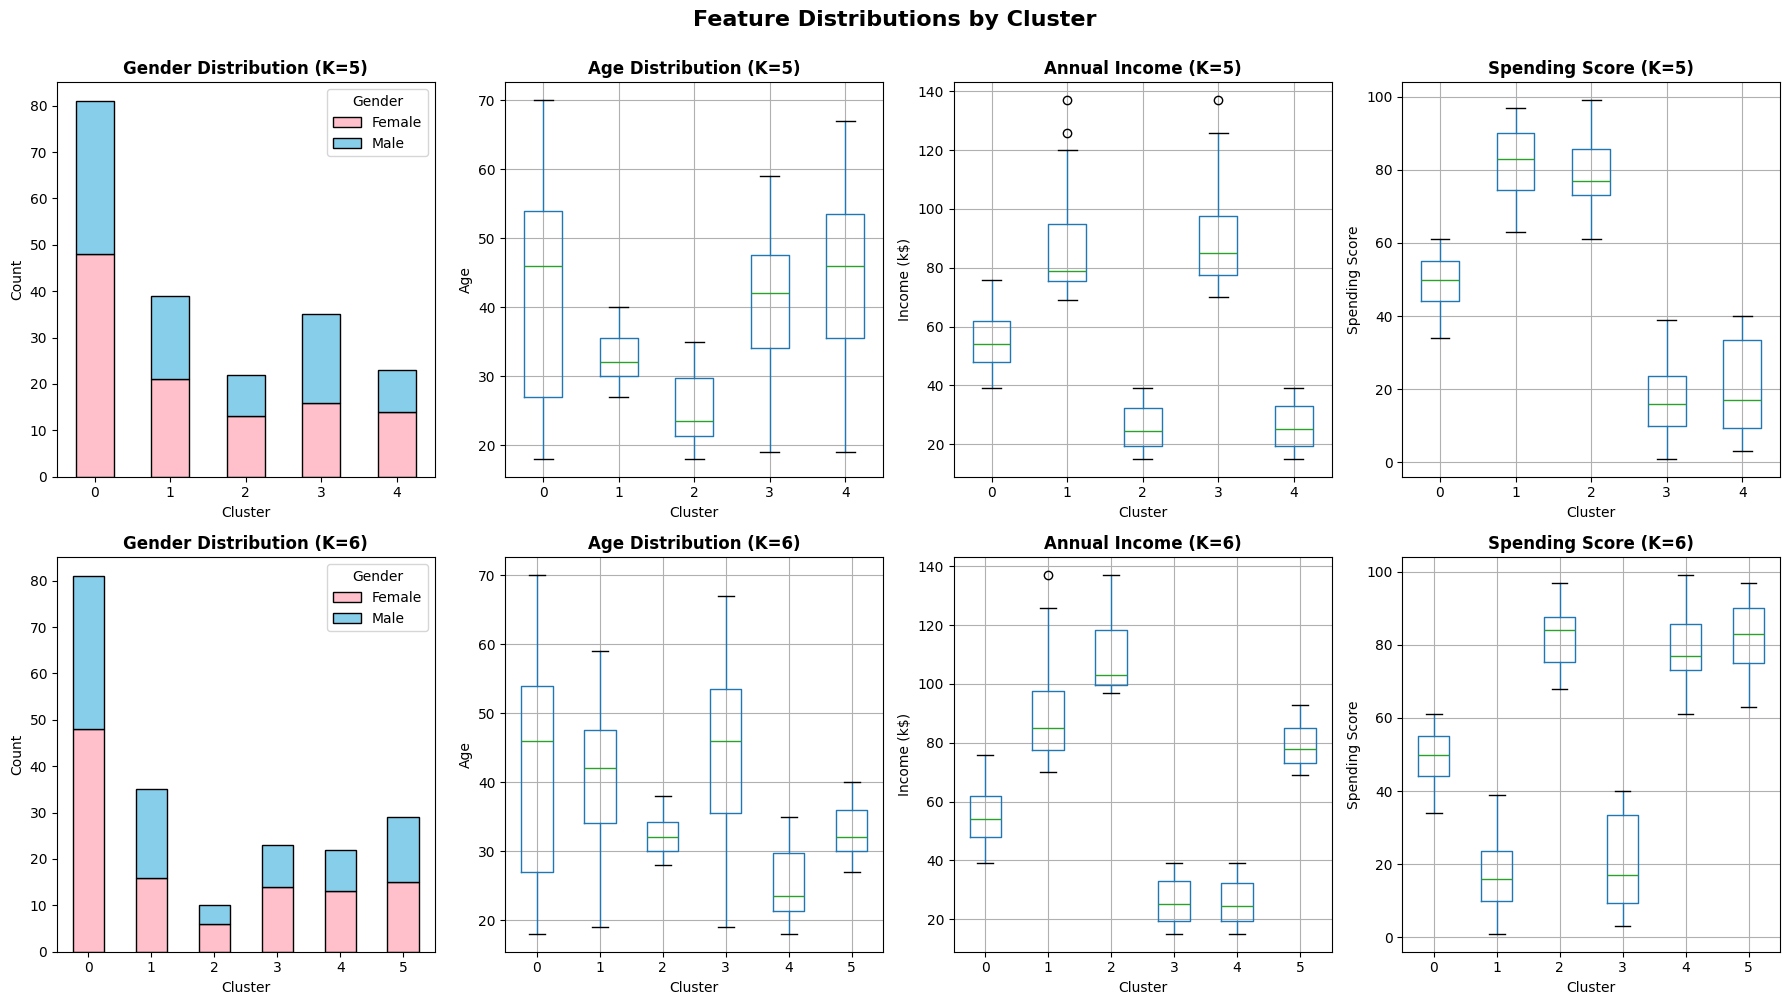

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10))

for k_idx, (k, cluster_col) in enumerate([(5, 'Cluster_K5'), (6, 'Cluster_K6')]):
    row = k_idx

    gender_counts = df.groupby([cluster_col, 'Gender']).size().unstack(fill_value=0)
    gender_counts.plot(kind='bar', stacked=True, ax=axes[row, 0],
                       color=['pink', 'skyblue'], edgecolor='black', linewidth=1)
    axes[row, 0].set_title(f'Gender Distribution (K={k})', fontweight='bold')
    axes[row, 0].set_xlabel('Cluster')
    axes[row, 0].set_ylabel('Count')
    axes[row, 0].legend(title='Gender', loc='upper right')
    axes[row, 0].tick_params(axis='x', rotation=0)

    df.boxplot(column='Age', by=cluster_col, ax=axes[row, 1])
    axes[row, 1].set_title(f'Age Distribution (K={k})', fontweight='bold')
    axes[row, 1].set_xlabel('Cluster')
    axes[row, 1].set_ylabel('Age')
    plt.sca(axes[row, 1])
    plt.xticks(range(1, k + 1), range(k))

    df.boxplot(column='Annual Income (k$)', by=cluster_col, ax=axes[row, 2])
    axes[row, 2].set_title(f'Annual Income (K={k})', fontweight='bold')
    axes[row, 2].set_xlabel('Cluster')
    axes[row, 2].set_ylabel('Income (k$)')
    plt.sca(axes[row, 2])
    plt.xticks(range(1, k + 1), range(k))

    df.boxplot(column='Spending Score (1-100)', by=cluster_col, ax=axes[row, 3])
    axes[row, 3].set_title(f'Spending Score (K={k})', fontweight='bold')
    axes[row, 3].set_xlabel('Cluster')
    axes[row, 3].set_ylabel('Spending Score')
    plt.sca(axes[row, 3])
    plt.xticks(range(1, k + 1), range(k))

plt.suptitle('')
fig.suptitle('Feature Distributions by Cluster', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## DBSCAN

### Find the Optimal Epsilon Value
Plot the number of data points by 4NN distance. The optimal distance point to choose would be at the "elbow" point which indicates the transition from dense regions to sparse regions.

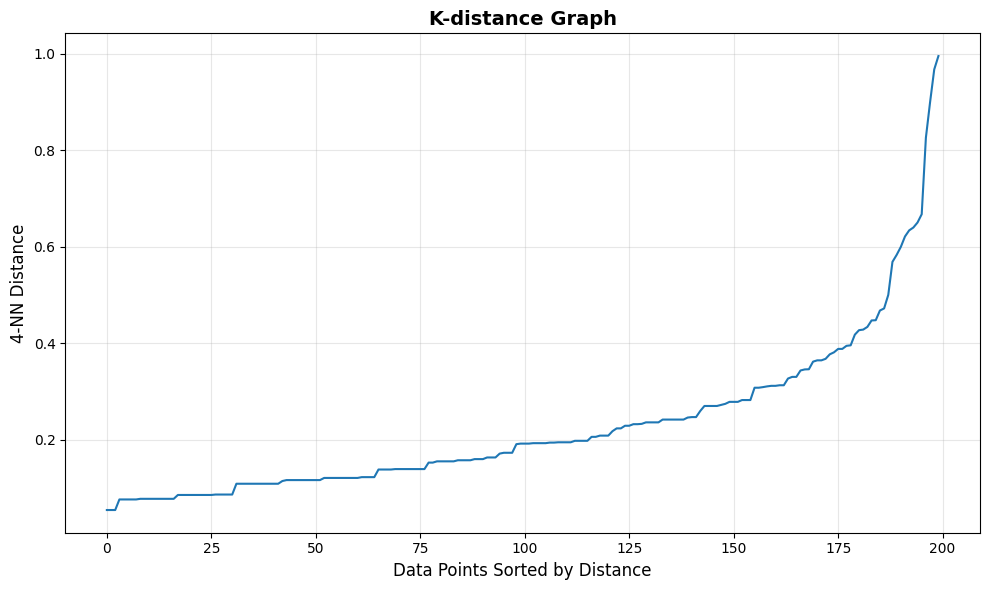

In [ ]:
k = 4
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, k-1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points Sorted by Distance', fontsize=12)
plt.ylabel(f'{k}-NN Distance', fontsize=12)
plt.title('K-distance Graph', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Fitting DBSCAN with Epsilon=0.35
Choose epsilon=0.35 as the optimal number value from the previous chart. Fit our DBSCAN model with this parameter and plot the resulting clusters.

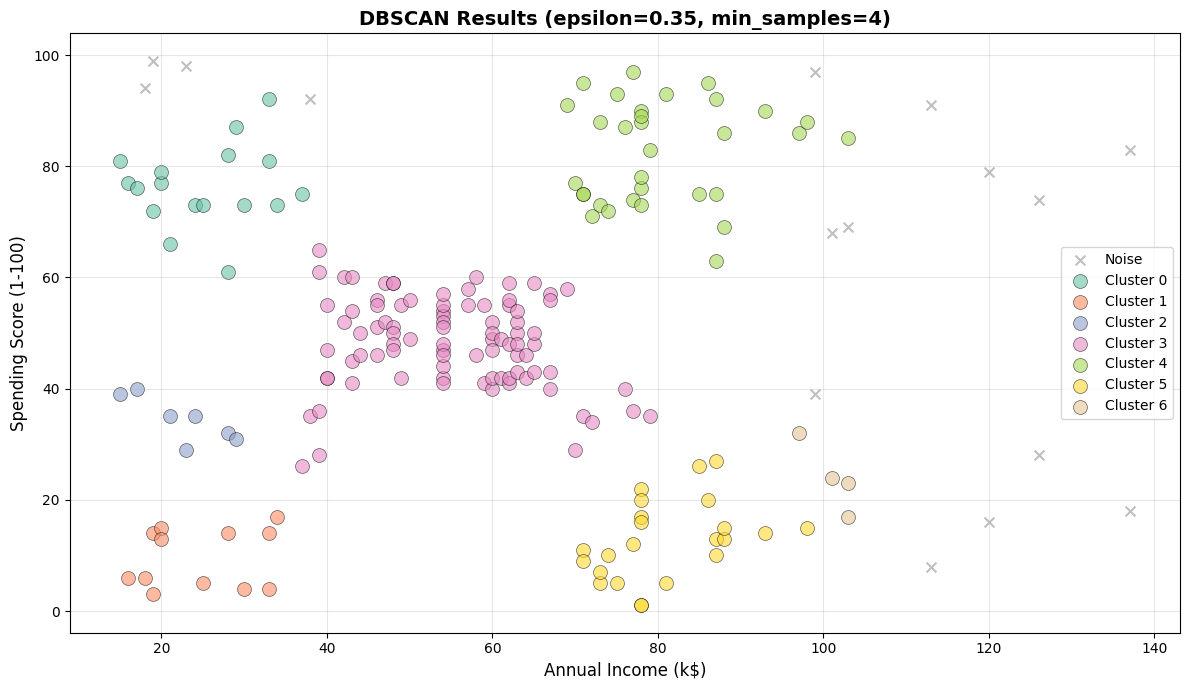

In [ ]:
eps = 0.35
min_samples = 4

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

n_clusters = len(set(df['Cluster_DBSCAN'])) - (1 if -1 in df['Cluster_DBSCAN'].values else 0)
n_noise = (df['Cluster_DBSCAN'] == -1).sum()

plt.figure(figsize=(12, 7))

if n_noise > 0:
    noise_data = df[df['Cluster_DBSCAN'] == -1]
    plt.scatter(noise_data['Annual Income (k$)'], noise_data['Spending Score (1-100)'],
                s=50, c='gray', marker='x', label='Noise', alpha=0.5)

colors = plt.cm.Set2(range(n_clusters))
cluster_idx = 0
for cluster_id in sorted(df['Cluster_DBSCAN'].unique()):
    if cluster_id == -1:
        continue
    cluster_data = df[df['Cluster_DBSCAN'] == cluster_id]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                s=100, c=[colors[cluster_idx]], label=f'Cluster {cluster_id}', alpha=0.6,
                edgecolors='black', linewidth=0.5)
    cluster_idx += 1

plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title(f'DBSCAN Results (epsilon={eps}, min_samples={min_samples})', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Interpretation: Profiling our Clusters
Now that we have assigned each data point to a cluster, we can analyze the distributions of each cluster to draw conclusions.

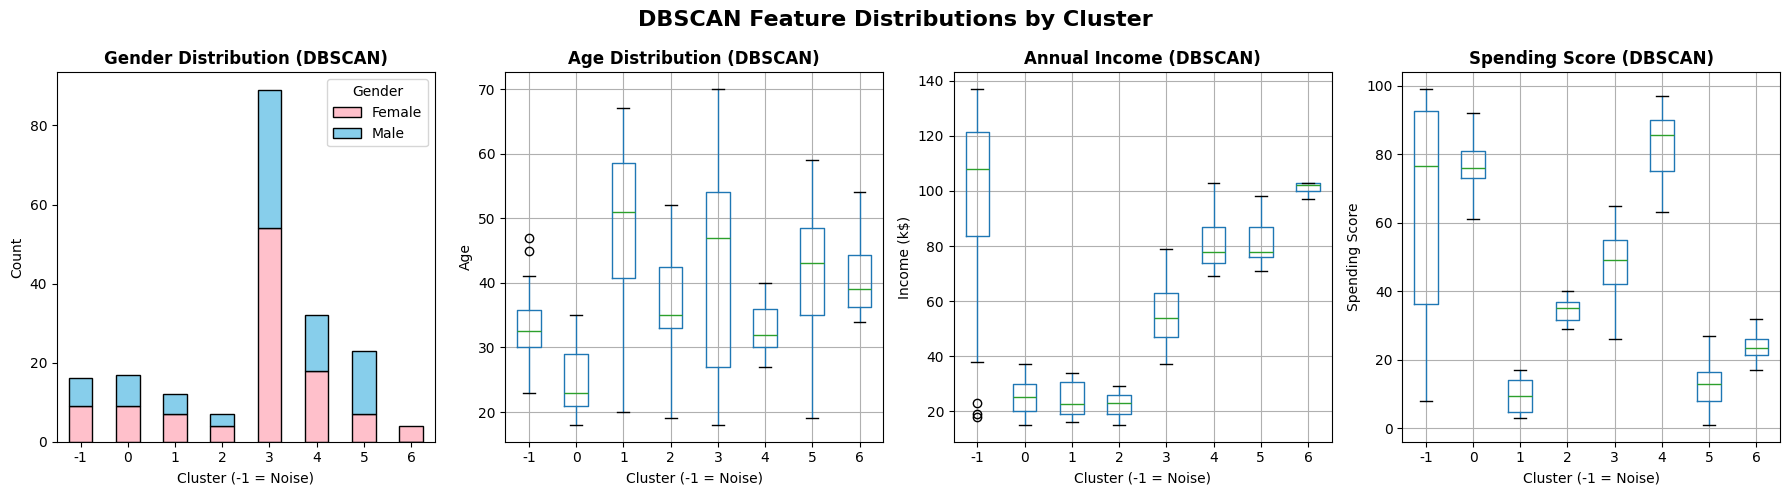

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

gender_counts = df.groupby(['Cluster_DBSCAN', 'Gender']).size().unstack(fill_value=0)
gender_counts.plot(kind='bar', stacked=True, ax=axes[0],
                   color=['pink', 'skyblue'], edgecolor='black', linewidth=1)
axes[0].set_title('Gender Distribution (DBSCAN)', fontweight='bold')
axes[0].set_xlabel('Cluster (-1 = Noise)')
axes[0].set_ylabel('Count')
axes[0].legend(title='Gender', loc='upper right')
axes[0].tick_params(axis='x', rotation=0)

df.boxplot(column='Age', by='Cluster_DBSCAN', ax=axes[1])
axes[1].set_title('Age Distribution (DBSCAN)', fontweight='bold')
axes[1].set_xlabel('Cluster (-1 = Noise)')
axes[1].set_ylabel('Age')

df.boxplot(column='Annual Income (k$)', by='Cluster_DBSCAN', ax=axes[2])
axes[2].set_title('Annual Income (DBSCAN)', fontweight='bold')
axes[2].set_xlabel('Cluster (-1 = Noise)')
axes[2].set_ylabel('Income (k$)')

df.boxplot(column='Spending Score (1-100)', by='Cluster_DBSCAN', ax=axes[3])
axes[3].set_title('Spending Score (DBSCAN)', fontweight='bold')
axes[3].set_xlabel('Cluster (-1 = Noise)')
axes[3].set_ylabel('Spending Score')

plt.suptitle('')
fig.suptitle('DBSCAN Feature Distributions by Cluster', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()